# **Build a machine learning model with Lineare regression, Logistic regression**

##Import the packages 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
#Advanced Linear Regression With statsmodels
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,roc_auc_score

from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# For dataframes
import pandas as pd 
# For numerical arrays
import numpy as np 

In [ ]:
#For ploting purpose
import seaborn as sns
import matplotlib.pyplot as plt

##**Provide data and prepare data. For linear regression**

X{array-like, sparse matrix} of shape (n,m), $n \times m$,training data. n rows are the n number of observations. m colums are the m features/independent variables.

y: array-like of shape (n,) or (n, k),response values. 

You should call .reshape() on X because this array is required to be two-dimensional, or to be more precise, to have one column and as many rows as necessary, in the case of one feature.  That’s exactly what the argument (-1, 1) of .reshape() specifies. For m features, .reshape(-1,m)

In [ ]:
from vega_datasets import data

In [ ]:
stocks_data.date

0     2000-01-01
1     2000-02-01
2     2000-03-01
3     2000-04-01
4     2000-05-01
         ...    
555   2009-11-01
556   2009-12-01
557   2010-01-01
558   2010-02-01
559   2010-03-01
Name: date, Length: 560, dtype: datetime64[ns]

In [ ]:

stocks_data = data.stocks()
stocks_data.symbol.unique()
stocks_data


,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45
...,...,...,...
555,AAPL,2009-11-01,199.91
556,AAPL,2009-12-01,210.73
557,AAPL,2010-01-01,192.06
558,AAPL,2010-02-01,204.62


In [ ]:
stocks_data['date']

0     2000-01-01
1     2000-02-01
2     2000-03-01
3     2000-04-01
4     2000-05-01
         ...    
555   2009-11-01
556   2009-12-01
557   2010-01-01
558   2010-02-01
559   2010-03-01
Name: date, Length: 560, dtype: datetime64[ns]

In [ ]:
def to_integer(dt_time):
    return 10000*dt_time.year + 100*dt_time.month + dt_time.day

stocks_data['datetime']=stocks_data['date'].apply(lambda x:to_integer(x))    

In [ ]:
stocks_data

,symbol,date,price,datetime
0,MSFT,2000-01-01,39.81,20000101
1,MSFT,2000-02-01,36.35,20000201
2,MSFT,2000-03-01,43.22,20000301
3,MSFT,2000-04-01,28.37,20000401
4,MSFT,2000-05-01,25.45,20000501
...,...,...,...,...
555,AAPL,2009-11-01,199.91,20091101
556,AAPL,2009-12-01,210.73,20091201
557,AAPL,2010-01-01,192.06,20100101
558,AAPL,2010-02-01,204.62,20100201


In [ ]:
stocks_data_sub=stocks_data[['price','datetime','symbol']]
stocks_data_sub.corr()

,price,datetime
price,1.000000,0.405187
datetime,0.405187,1.000000


In [ ]:
X=stocks_data_sub[['datetime']] # can add more columns ['datetime','symbol']
X.shape


(560, 1)

In [ ]:
X=np.array(stocks_data_sub['datetime'])
X.shape
X=X.reshape((-1, 1))
X.shape

(560, 1)

In [ ]:

y=np.array(stocks_data_sub['price'])
y.shape

(560,)

##Create a regression model and fit it with existing data.
With .fit(), you calculate the optimal values of the weights  $\beta_{0}$  and  $\beta_{1}$ , using the existing input and output (X and y) as the arguments.

check $R^{2}$ from .score(X,y), value of 1 means perfect fit.

Get coefficient model.coef_,  model.intercept_

Compute predicted values for a given X, model.predict(X)

The coefficient of determination, denoted as 𝑅², tells you which amount of variation in 𝑦 can be explained by the dependence on 𝐱 using the particular regression model. Larger 𝑅² indicates a better fit and means that the model can better explain the variation of the output with different inputs.


In [ ]:
model=LinearRegression()
reg = model.fit(X, y)
r_sq=reg.score(X,y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.16417680530051293


In [ ]:
y_pred = model.predict(X)
#print('predicted response:', y_pred, sep='\n')
predicted_stock=pd.concat([stocks_data,pd.DataFrame(y_pred)],axis=1)
tempcol=list(stocks_data.columns.values)
tempcol.extend(['predicted'])
predicted_stock.columns=tempcol

In [ ]:
predicted_stock

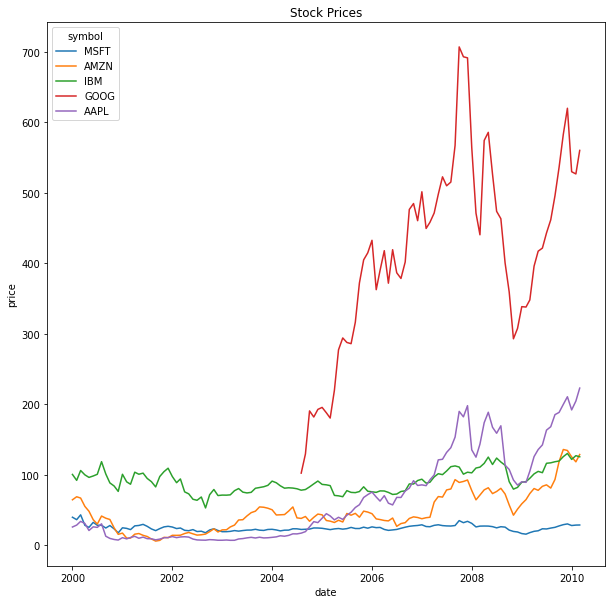

In [ ]:
plt.figure(figsize=(10, 10))
sns.lineplot(x='date',y='price', hue='symbol',data=predicted_stock)
#sns.pointplot(x='date',y='predicted', hue='symbol',data=predicted_stock)
plt.title("Stock Prices")
plt.show()


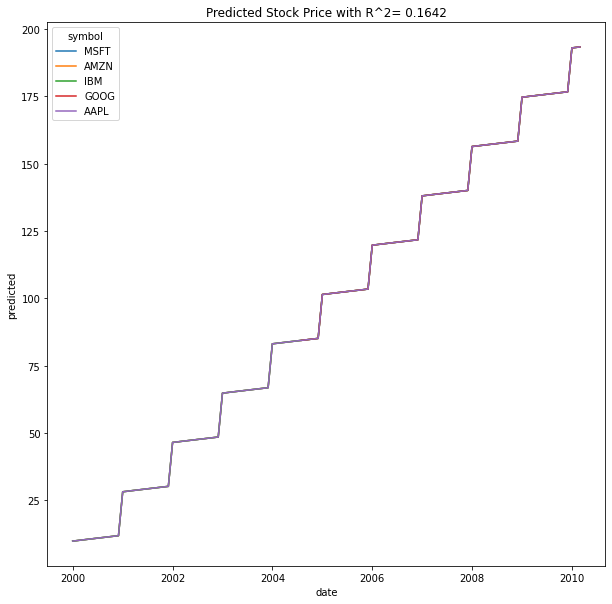

In [ ]:

plt.figure(figsize=(10, 10))
sns.lineplot(x='date',y='predicted', hue='symbol',data=predicted_stock)
#sns.pointplot(x='date',y='predicted', hue='symbol',data=predicted_stock)
plt.title("Predicted Stock Price with R^2= " +str(round(r_sq,4)))

plt.show()

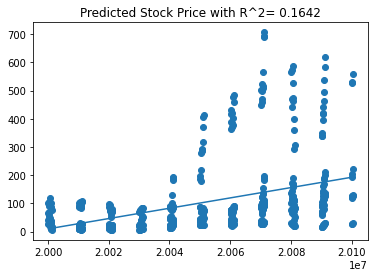

In [ ]:

plt.scatter(predicted_stock['datetime'], predicted_stock['price'])
plt.plot(predicted_stock['datetime'], predicted_stock['predicted'])
plt.title("Predicted Stock Price with R^2= " +str(round(r_sq,4)))

plt.show()

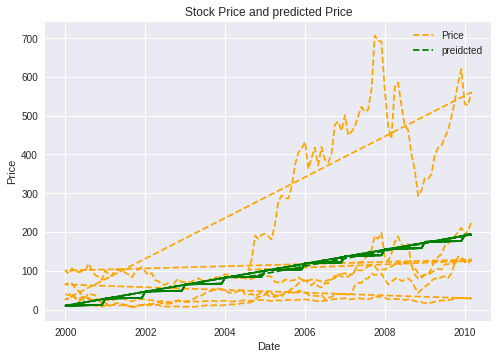

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(predicted_stock['date'], predicted_stock['price'], linestyle='--',color='orange', label='Price')
plt.plot(predicted_stock['date'], predicted_stock['predicted'], linestyle='--',color='green', label='preidcted')
# title
plt.title('Stock Price and predicted Price')
# x label
plt.xlabel('Date')
# y label
plt.ylabel('Price')
plt.legend(loc='best')
plt.savefig('PredictedPlot',dpi=300)
plt.show()

####SNS has lm fit and plot it

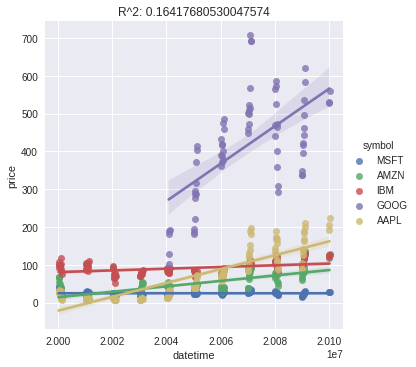

In [ ]:
r_sq = stocks_data_sub.corr()['datetime'][0] ** 2
sns.lmplot(x='datetime', y='price', hue='symbol', data=stocks_data_sub)
plt.title('R^2: {}'.format(r_sq))
plt.show()

##Polynomial Regression With scikit-learn

In [ ]:
transformer = PolynomialFeatures(degree=4, include_bias=False)

In [ ]:
transformer.fit(X)
X_ = transformer.transform(X)


In [ ]:
model = LinearRegression().fit(X_, y)
r_sq = model.score(X_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.1688803039324306
intercept: 755859.7342492382
coefficients: [-9.44749244e-31 -3.24502756e-23 -3.79731110e-16  1.42625964e-23]


##Advanced Linear Regression With statsmodels

In [ ]:
#You need to add the column of ones to the inputs if you want statsmodels to calculate the intercept
X_ = sm.add_constant(X)
model = sm.OLS(y, X_)
results = model.fit()
print(results.summary())

In [ ]:
filter=stocks_data.symbol=="GOOG"
goog_data=stocks_data[filter]
goog_data

In [ ]:
sns.distplot(goog_data.price, kde=True, rug=True)
plt.title('Dist of price')
plt.show()

##Logistic regression

In [ ]:
#The iris dataset is a classic and very easy multi-class classification dataset
from sklearn.datasets import load_iris


In [ ]:
X, y = load_iris(return_X_y=True)
X.shape, y.shape


((150, 4), (150,))

In [ ]:
X[1,]

array([4.9, 3. , 1.4, 0.2])

In [ ]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

(120, 4)

In [ ]:
 
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("Precision:",metrics.precision_score(y_test, y_pred))
#print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:

#cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

##Visualizing the confusion matrix with heatmap
Heat maps display numeric tabular data where the cells are colored depending upon the contained value.

---



In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g',ax=ax)#cmap='coolwarm',"YlGnBu"
#ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
plt.savefig('HeatMap',dpi=300)
###

###**Roc cure for two classes**


\begin{array}{c} \hline
True & Predicted & Predicted  \\ \hline
P& TP & FN  \\
N & FP & TN  \\ \hline
\end{array}


### Measurement 

** AUC-ROC curve**

TPR (True Positive Rate) = # True positives / # positives = TP / (TP+FN)

FPR (False Positive Rate) = # False Positives / # negatives = FP / (FP+TN)


the AUC-ROC curve helps us visualize how well our machine learning classifier is performing. It works for only binary classification problems, we will see that we can extend it to evaluate multi-class classification problems too.
It is a probability curve that plots the TPR(True positive rate) against FPR(false positive rate) at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

**Precision and Recall**


Precision =# True positives / # predicted positive = TP/(TP+FP)

Recall = # True positives / # positives = TP / (TP+FN)

**For three classes**

For example, the precision for the Cat class is the number of correctly predicted Cat out of all predicted Cat. The recall for Cat is the number of correctly predicted Cat out of the number of actual Cat.

Precision is more focused in the positive class than in the negative class, it actually measures the probability of correct detection of positive values.
while FPR and TPR (ROC metrics) measure the ability to distinguish between the classes.

Sensitivity or recall tells us what proportion of the positive class got correctly classified.

With a large number of negative samples — precision is probably better, because it is not affected by a large number of negative samples, that’s because it measures the number of true positives out of the samples predicted as positives (TP+FP).

With a Majority of positive samples, all positive samples are detected but there are also false positives — ROC is a better metric.

A simple example would be to determine what proportion of the actual sick people were correctly detected by the model.

**Use precision and recall to focus on small positive class** — When the positive class is smaller and the ability to detect correctly positive samples is our main focus (correct detection of negatives examples is less important to the problem) we should use precision and recall.

**Use ROC when both classes detection is equally important** — When we want to give equal weight to both classes prediction ability we should look at the ROC curve.

**Use ROC when the positives are the majority or switch the labels and use precision and recall** — When the positive class is larger we should probably use the ROC metrics because the precision and recall would reflect mostly the ability of prediction of the positive class and not the negative class which will naturally be harder to detect due to the smaller number of samples. If the negative class (the minority in this case) is more important, we can switch the labels and use precision and recall (As we saw in the examples above — switching the labels can change everything).


In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## ROC Curve for mutlple classes

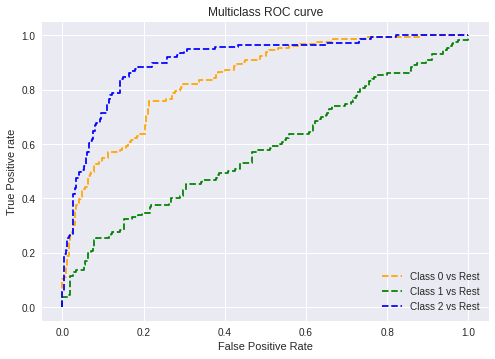

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import make_classification
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

##HW
1. Review the measurement methods and think examples of different samples.

2. Predict stock price using two features ['datetime','syomol]. ordinal categorical variables, nominal categorical variables.
dummy coding for nominal categorical variables

In [ ]:
from sklearn.preprocessing import OrdinalEncoder # for encoding categorical features from strings to number arrays
from sklearn.preprocessing import LabelEncoder#for encoding, converting catogroey variables

In [ ]:
stocks_data = data.stocks()
stocks_data.symbol.unique()
stocks_data

In [ ]:
set(stocks_data['symbol'])

{'AAPL', 'AMZN', 'GOOG', 'IBM', 'MSFT'}

In [ ]:
stocks_data['s1']=stocks_data['symbol'].apply(lambda x: 1 if x=="GOOG" else 0)
stocks_data['s2']=stocks_data['symbol'].apply(lambda x: 1 if x=="AMAZON" else 0)
stocks_data['s3']=stocks_data['symbol'].apply(lambda x: 1 if x=="AAPL" else 0)
stocks_data['s4']=stocks_data['symbol'].apply(lambda x: 1 if x=="MSFT" else 0)

In [ ]:
stocks_data

,symbol,date,price,datetime,s1,s2,s3,s4
0,MSFT,2000-01-01,39.81,20000101,0,0,0,1
1,MSFT,2000-02-01,36.35,20000201,0,0,0,1
2,MSFT,2000-03-01,43.22,20000301,0,0,0,1
3,MSFT,2000-04-01,28.37,20000401,0,0,0,1
4,MSFT,2000-05-01,25.45,20000501,0,0,0,1
...,...,...,...,...,...,...,...,...
555,AAPL,2009-11-01,199.91,20091101,0,0,1,0
556,AAPL,2009-12-01,210.73,20091201,0,0,1,0
557,AAPL,2010-01-01,192.06,20100101,0,0,1,0
558,AAPL,2010-02-01,204.62,20100201,0,0,1,0


In [ ]:
def to_integer(dt_time):
    return 10000*dt_time.year + 100*dt_time.month + dt_time.day

stocks_data['datetime']=stocks_data['date'].apply(lambda x:to_integer(x))  

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
X2=scaler.fit_transform(np.array(stocks_data['datetime']).reshape(-1,1))
X2

In [ ]:
X=pd.concat([pd.DataFrame(X2),stocks_data[['s1','s2','s3','s4']]],axis=1)
y=np.array(stocks_data['price'])

In [ ]:

X.shape

(560, 5)

In [ ]:
model=LinearRegression()
reg = model.fit(X, y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
y_pred = reg.predict(X)
#print('predicted response:', y_pred, sep='\n')
predicted_stock=pd.concat([stocks_data,pd.DataFrame(y_pred)],axis=1)
temp=list(stocks_data.columns.values)
temp.extend(['predicted'])
predicted_stock.columns=temp

predicted_stock

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


,symbol,date,price,datetime,s1,s2,s3,s4,predicted
0,MSFT,2000-01-01,39.81,20000101,0,0,0,1,-16.132011
1,MSFT,2000-02-01,36.35,20000201,0,0,0,1,-16.044835
2,MSFT,2000-03-01,43.22,20000301,0,0,0,1,-15.957658
3,MSFT,2000-04-01,28.37,20000401,0,0,0,1,-15.870482
4,MSFT,2000-05-01,25.45,20000501,0,0,0,1,-15.783305
...,...,...,...,...,...,...,...,...,...
555,AAPL,2009-11-01,199.91,20091101,0,0,1,0,103.192326
556,AAPL,2009-12-01,210.73,20091201,0,0,1,0,103.279502
557,AAPL,2010-01-01,192.06,20100101,0,0,1,0,111.038209
558,AAPL,2010-02-01,204.62,20100201,0,0,1,0,111.125385


In [ ]:


# summarize the fit of the model
mse = np.mean((y_pred-y)**2)
print("MSE", mse) 
print("SCORE",reg.score(X, y))
print('intercept:', reg.intercept_)
print('coefficients:', reg.coef_)


MSE 2891.261952845664
SCORE 0.8351560806293368
intercept: 72.03695286646692
coefficients: [ 25.5466506  326.37612345   0.          -4.89365854 -44.88739837]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


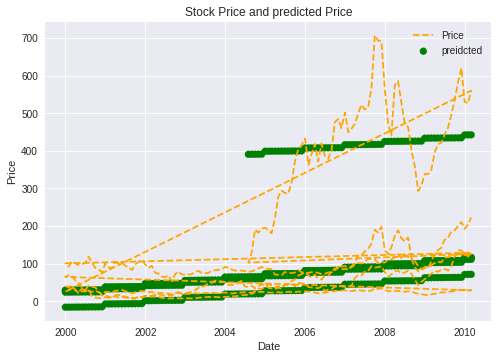

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(predicted_stock['date'], predicted_stock['price'], linestyle='--',color='orange', label='Price')
plt.scatter(predicted_stock['date'], predicted_stock['predicted'], linestyle='--',color='green', label='preidcted')
# title
plt.title('Stock Price and predicted Price')
# x label
plt.xlabel('Date')
# y label
plt.ylabel('Price')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

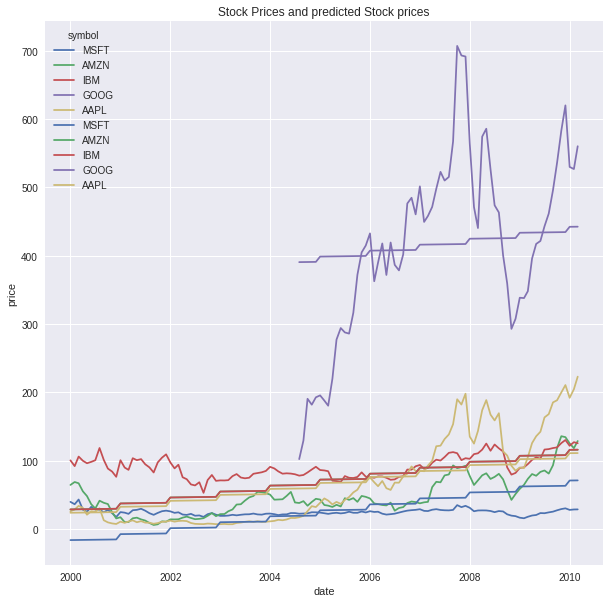

In [ ]:
plt.figure(figsize=(10, 10))
sns.lineplot(x='date',y='price', hue='symbol',data=predicted_stock)
sns.lineplot(x='date',y='predicted', hue='symbol',data=predicted_stock)
plt.title("Stock Prices and predicted Stock prices")
plt.show()

In [ ]:

r_sq = reg.score(X, y)
print('coefficient of determination:', r_sq)
print('intercept:', reg.intercept_)
print('coefficients:', reg.coef_)

## Another data set

In [ ]:
tips_data = sns.load_dataset('tips')
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips_data.shape

(244, 7)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


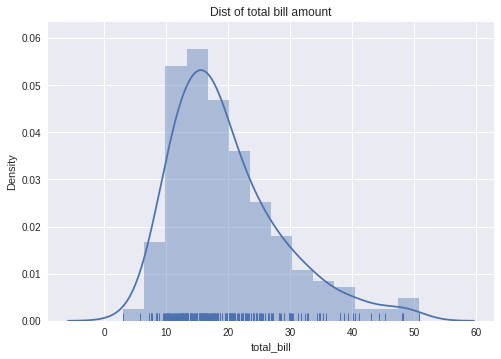

In [ ]:
sns.distplot(tips_data.total_bill, kde=True, rug=True)
plt.title('Dist of total bill amount')
plt.show()

In [ ]:
female_data = tips_data[tips_data.sex=='Female']
male_data = tips_data[tips_data.sex=='Male']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

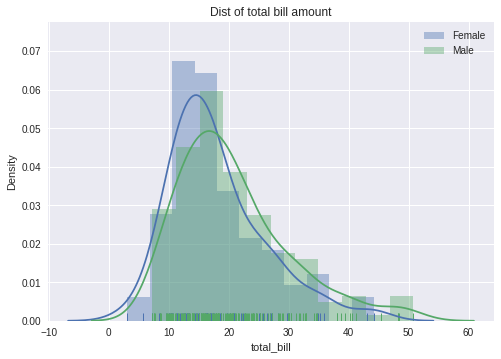

In [ ]:
sns.distplot(female_data.total_bill, kde=True, rug=True, label='Female')
sns.distplot(male_data.total_bill, kde=True, rug=True, label='Male')
plt.title('Dist of total bill amount')
plt.legend()
plt.show()

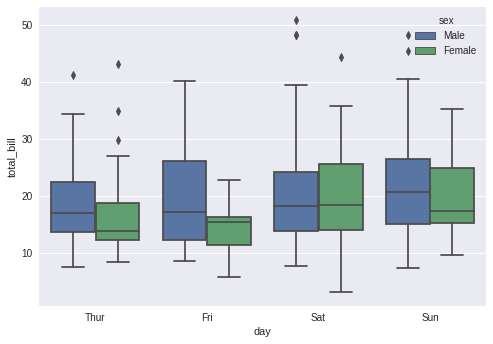

In [ ]:
sns.boxplot(x='day', y='total_bill', hue='sex', data=tips_data, showfliers=True)
plt.show()

In [ ]:
tips_data_subset = tips_data[['total_bill', 'tip']]
tips_data_subset

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


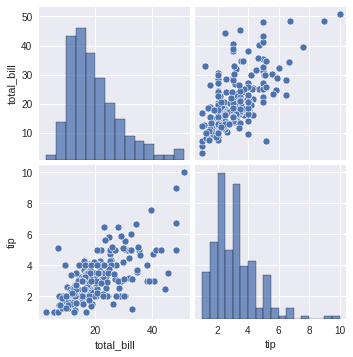

In [ ]:
sns.pairplot(tips_data_subset)

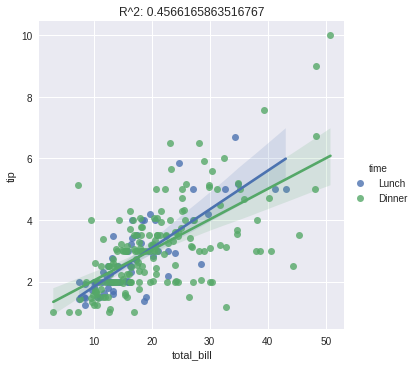

In [ ]:
r_sq = tips_data_subset.corr()['tip'][0] ** 2
sns.lmplot(x='total_bill', y='tip', hue='time', data=tips_data)
plt.title('R^2: {}'.format(r_sq))
plt.show()

In [ ]:
# Logistic function

In [ ]:
tips_data['big_tip'] = (tips_data.tip / tips_data.total_bill) > .15
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size,big_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False


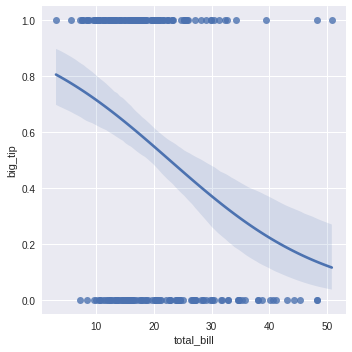

In [ ]:
sns.lmplot(x='total_bill', y='big_tip', data=tips_data, logistic=True)

In [ ]:
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])
clf.predict_proba(X[:2, :])
clf.score(X, y)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9733333333333334